# Annotation Queries - Figure 5 & Extended Data Figure 7

This notebook creates the plots presented in Figure 5 & Extended Data Figure 7 of the CAVE paper.

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Define relevant paths and create directories


In [2]:
data_dir = f"{os.path.realpath('')}/../data"
figure5_dir = f"{os.path.realpath('')}/../figures/figure_5/"
extfigure7_dir = f"{os.path.realpath('')}/../figures/extfigure_7/"

if not os.path.exists(figure5_dir):
    os.makedirs(figure5_dir)
if not os.path.exists(extfigure7_dir):
    os.makedirs(extfigure7_dir)

In [3]:
presyn_cmap = {"live-changed": [.8, .1, .1], "snapshot": [0, 0, 0], "live": [.97, .6, .04]}

## Load data

In [4]:
synapse_qtime_df = pd.read_csv(f"{data_dir}/synapse_qtime_vs_edits.csv")

## Plotting

## Snapshot query times - no edits

In [5]:
synapse_qtime_noedit_df = synapse_qtime_df[synapse_qtime_df["edits"] == 0]
base = np.array(["snapshot"] * len(synapse_qtime_noedit_df))
base[np.array(synapse_qtime_noedit_df["delta_hour"] != 0)] = "live"

synapse_qtime_noedit_df["base"] = base
synapse_qtime_noedit_df = synapse_qtime_noedit_df.groupby(["root_id", "base"]).aggregate({"time": "mean", "size": 'first', "base_root_id": 'first', "edits": 'first'}).reset_index(drop=False)

/var/folders/l0/qtsjzxls2bld95db29_8k_4r0000gn/T/ipykernel_4240/2620381140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synapse_qtime_noedit_df["base"] = base


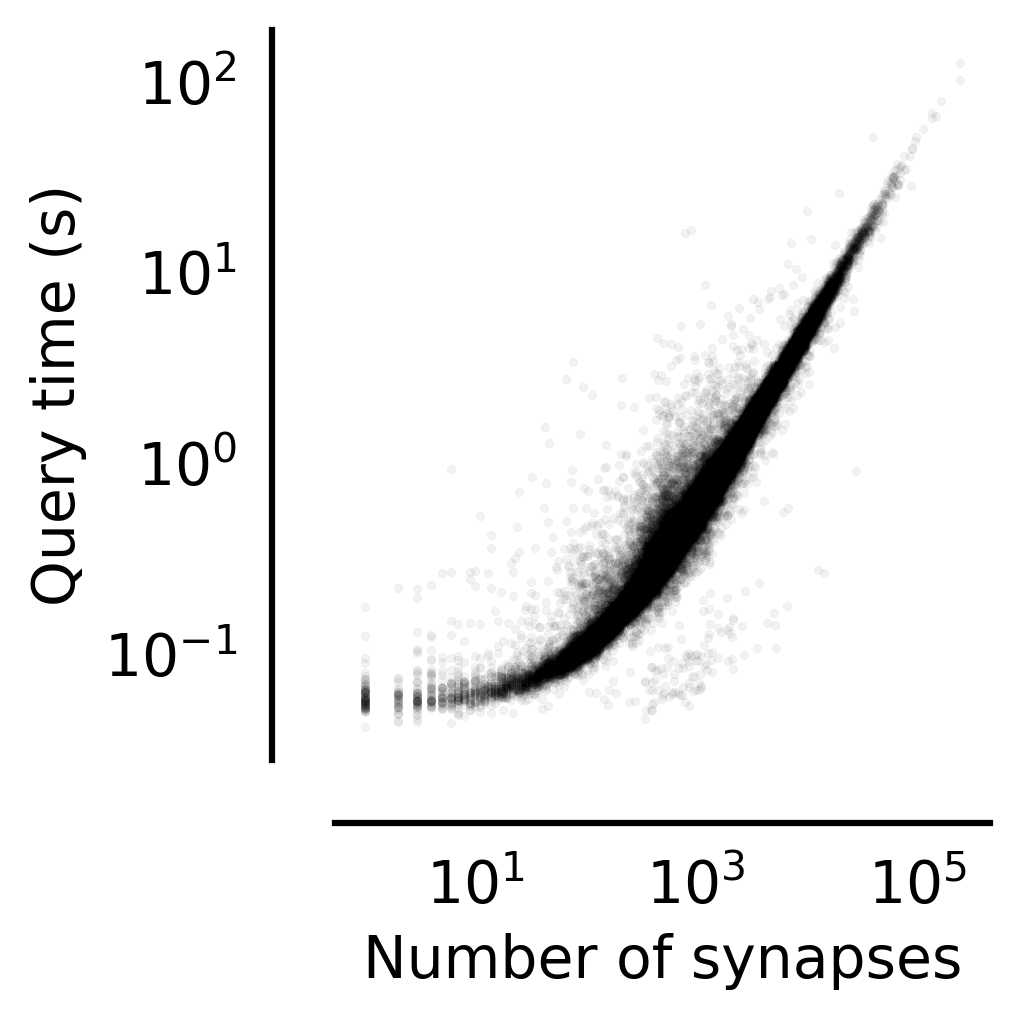

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=5, width=0, labelsize=14, which="major")
plt.tick_params(length=5, width=0, labelsize=14, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)

sns.scatterplot(data=synapse_qtime_noedit_df[synapse_qtime_noedit_df["base"] == "snapshot"], x="size", y="time",
                color=presyn_cmap["snapshot"], 
                s=4, alpha=.05, edgecolor=None)
plt.xscale("log")
plt.yscale("log")

plt.ylabel("Query time (s)", fontsize=14)
plt.xlabel("Number of synapses", fontsize=14)

sns.despine(ax=ax, offset=15, trim=False)
plt.tight_layout()

plt.savefig(f"{extfigure7_dir}/presyn_snapshot_query_time_vs_size_scatter.png", dpi=300)
plt.savefig(f"{extfigure7_dir}/presyn_snapshot_query_time_vs_size_scatter.pdf", dpi=300)

plt.show()

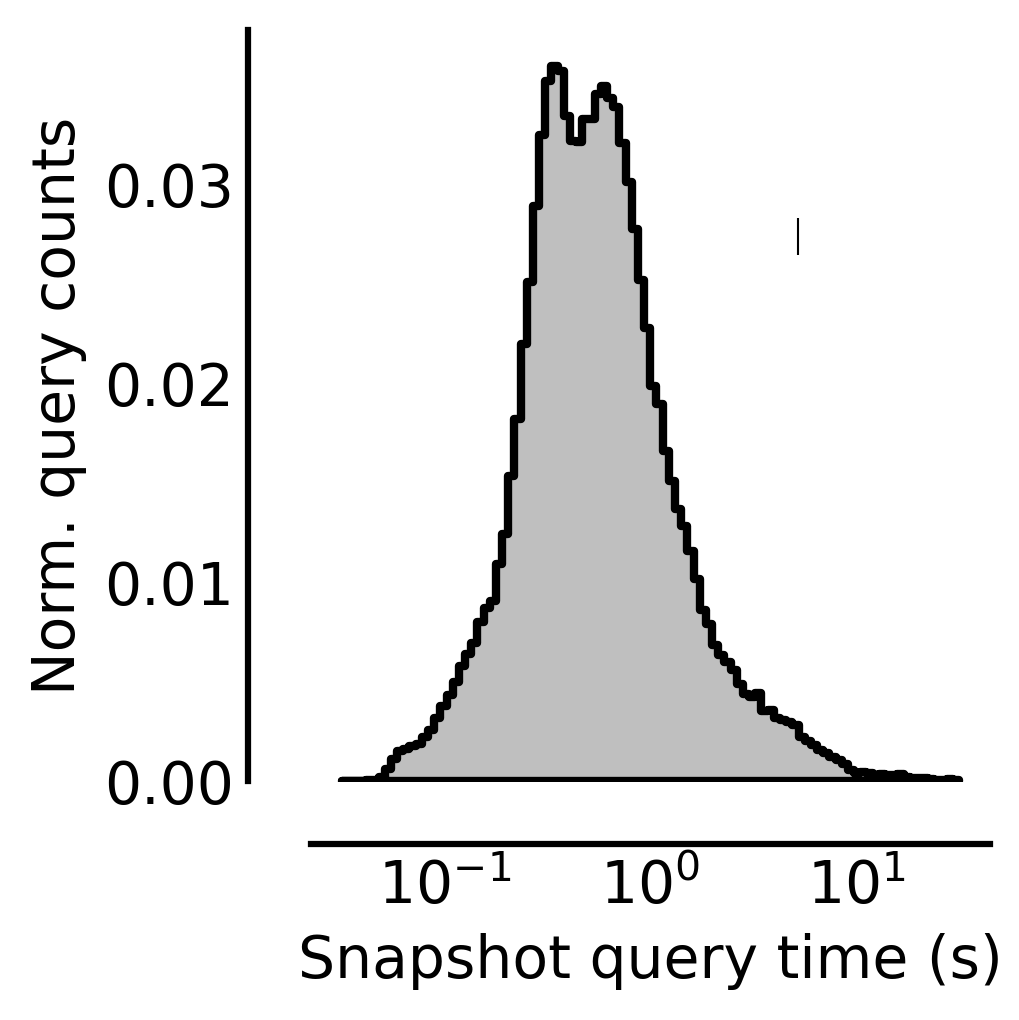

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=14, which="major")
plt.tick_params(length=0, width=0, labelsize=14, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)

sns.histplot(data=synapse_qtime_noedit_df[synapse_qtime_noedit_df["base"] == "snapshot"], x="time", hue="base", 
             bins=np.logspace(-1.5, 1.5, 101), 
             stat="probability", common_norm=False, legend=False,
             palette=presyn_cmap,
             element="step", lw=2)
plt.xscale("log")

ymax = plt.ylim()[1]
try:
    plt.vlines(float(synapse_qtime_noedit_df[np.array(synapse_qtime_noedit_df["root_id"] == 720575940643740872) & np.array(synapse_qtime_noedit_df["base"] == "snapshot")]["time"].iloc[0]), ymax * .7, ymax * .75, color="k", lw=.5)
except:
    pass

plt.xlabel("Snapshot query time (s)", fontsize=14)
plt.ylabel("Norm. query counts", fontsize=14)

plt.yticks([0, 0.01, 0.02, 0.03])

sns.despine(ax=ax, offset=15, trim=False)
plt.tight_layout()

plt.savefig(f"{figure5_dir}/presyn_query_performance_snapshot_hist.png", dpi=300)
plt.savefig(f"{figure5_dir}/presyn_query_performance_snapshot_hist.pdf", dpi=300)

plt.show()

## Non-snapshot query times - no edits

In [8]:
meas_noedit_comp_df = synapse_qtime_noedit_df.drop(columns=["base_root_id", "edits", "size"]).groupby(["root_id", "base"]).mean().reset_index().pivot(index="root_id", columns="base", values="time").reset_index()
meas_noedit_comp_df = meas_noedit_comp_df[np.array(~meas_noedit_comp_df["live"].isna()) & np.array(~meas_noedit_comp_df["snapshot"].isna())].reset_index(drop=True)

avg_diff = meas_noedit_comp_df["live"].mean() - meas_noedit_comp_df["snapshot"].mean()
res = stats.linregress(meas_noedit_comp_df["snapshot"], meas_noedit_comp_df["live"])

In [9]:
res.intercept, res.slope

(0.43777554642117755, 1.0535566666353153)

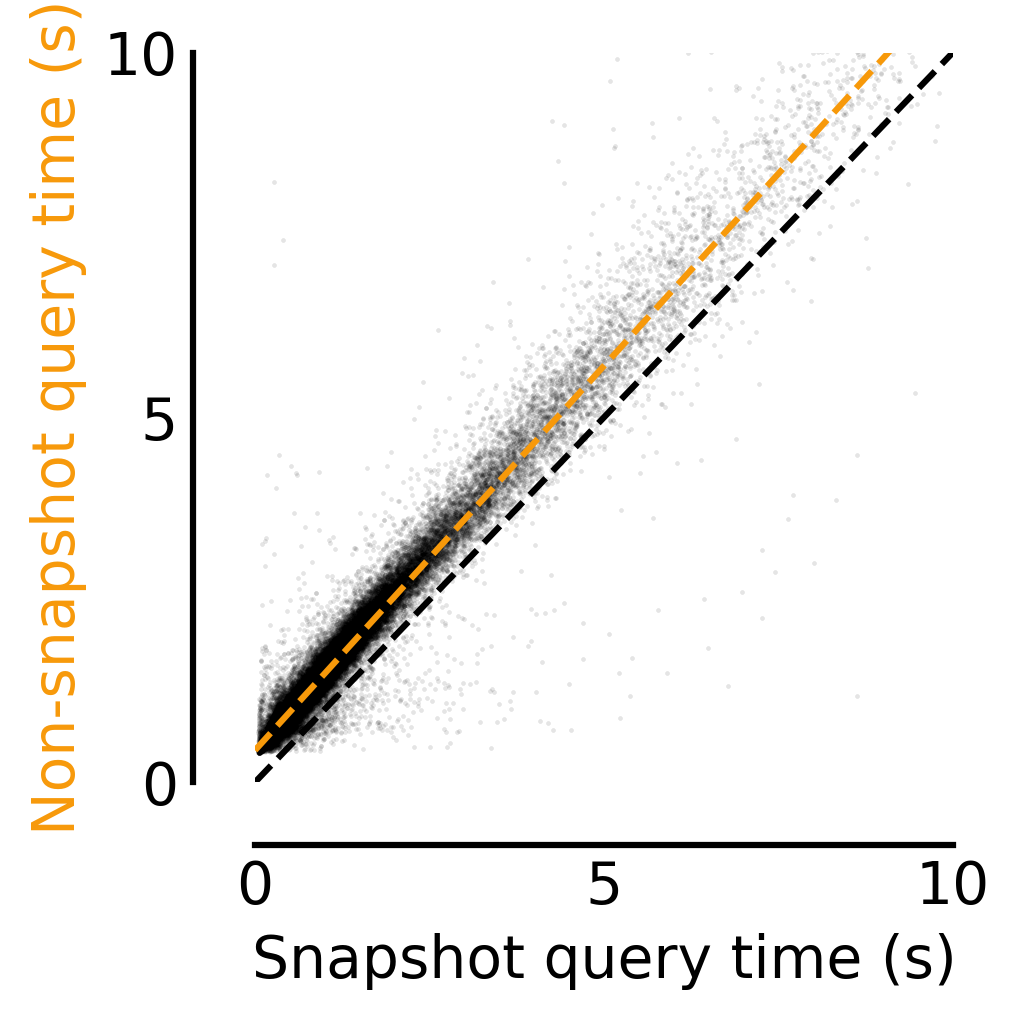

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=14, which="major")
plt.tick_params(length=0, width=0, labelsize=14, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)
    
sns.scatterplot(data=meas_noedit_comp_df, x="snapshot", y="live", alpha=.1, color="k", edgecolor=None, s=1)
    

plt.xlabel("Snapshot query time (s)", fontsize=14, color=presyn_cmap["snapshot"])
plt.ylabel("Non-snapshot query time (s)", fontsize=14, color=presyn_cmap["live"])

sns.despine(ax=ax, offset=15, trim=False)

plt.plot([0, 100], [0, 100], color="k", ls="--", zorder=-1)
plt.plot([0, 100], [res.intercept, res.intercept + res.slope*100], c=presyn_cmap["live"], ls='--')

ticks = np.linspace(0, 10, 3)
plt.xticks(ticks)
plt.yticks(ticks)

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.tight_layout()

plt.savefig(f"{extfigure7_dir}/presyn_query_performance_nochange_scatter.png", dpi=300)
plt.savefig(f"{extfigure7_dir}/presyn_query_performance_nochange_scatter.pdf", dpi=300)

plt.show()

### Query times vs edits

In [11]:
synapse_qtime_gdf = synapse_qtime_df.groupby(["category", "base_root_id", "edits", "size"])["time"].mean().reset_index()

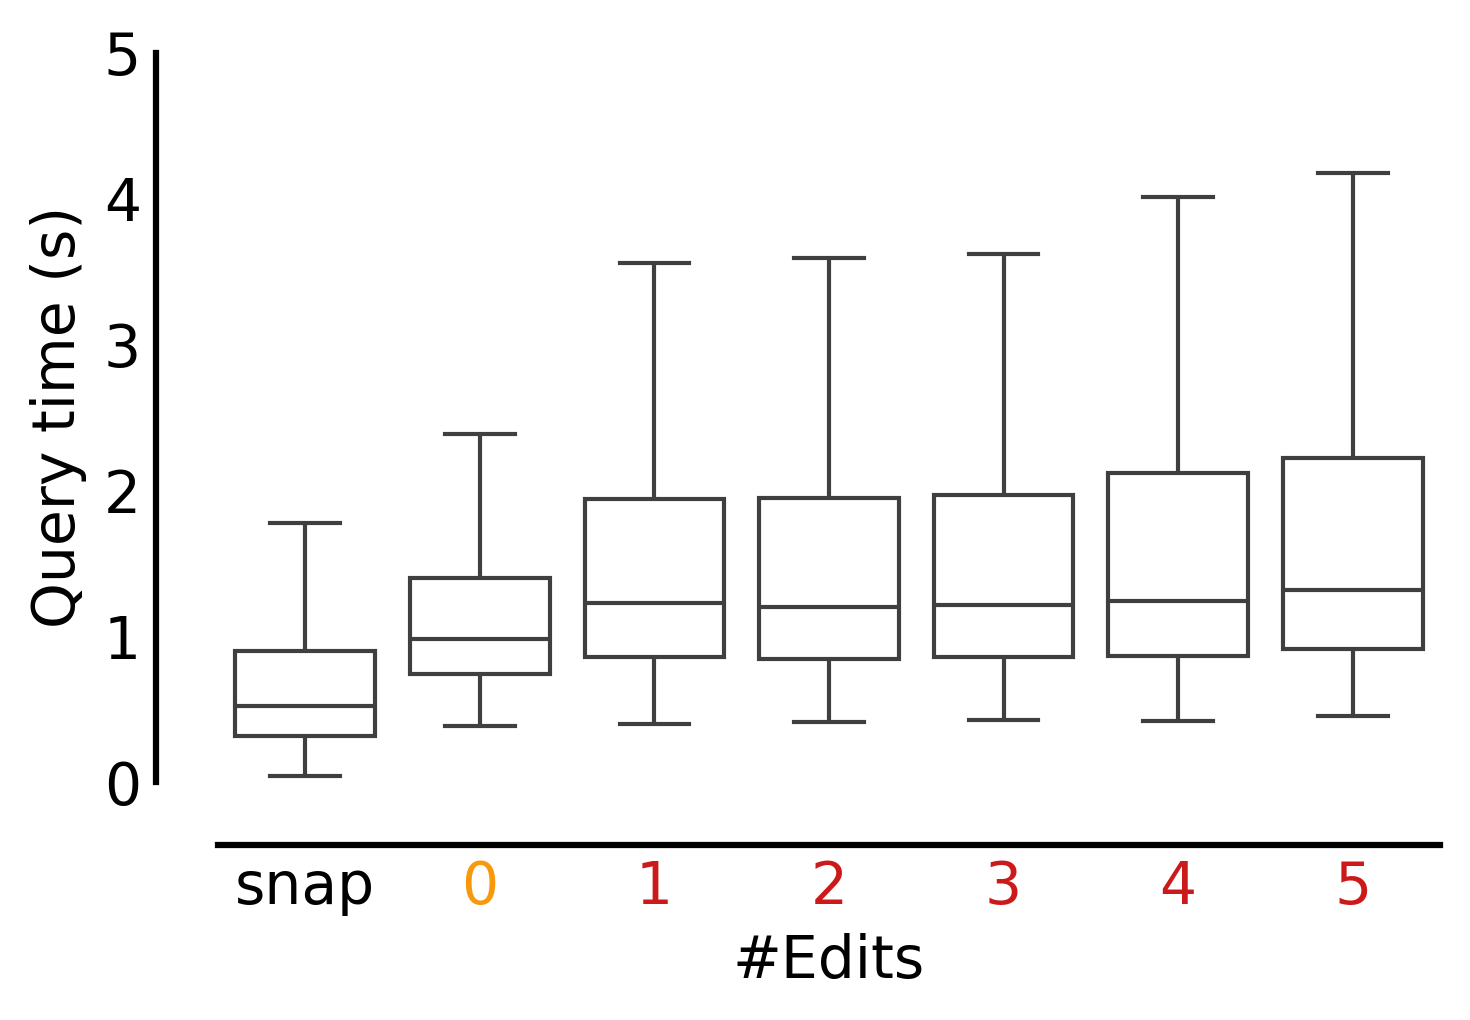

In [12]:
cat_order = ["snap"] + [f"{i}" for i in range(6)]
tick_colors = [presyn_cmap["snapshot"]] + [presyn_cmap["live"]] + [presyn_cmap["live-changed"]] * 5

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=14, which="major")
plt.tick_params(length=0, width=0, labelsize=14, which="minor")

# for ax in fig.axes:
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(0)
ax.spines["top"].set_linewidth(0)

gs = sns.boxplot(data=synapse_qtime_gdf, x="category", y="time", showfliers=False,
                 order=cat_order, boxprops={"facecolor": "w"}, dodge=False, ax=ax)


plt.ylim(0, 5)

plt.ylabel("Query time (s)", fontsize=14)
plt.xlabel("#Edits", fontsize=14)

plt.draw()

sns.despine(offset=15, trim=False)
plt.tight_layout()

# Get current xtick labels
xticklabels = ax.get_xticklabels()

# Set xtick labels with the specified colors
for i, label in enumerate(xticklabels):
    label.set_color(tick_colors[i])

plt.savefig(f"{figure5_dir}/presyn_query_edits_vs_time.png", dpi=300)
plt.savefig(f"{figure5_dir}/presyn_query_edits_vs_time.pdf", dpi=300)

plt.show()

In [13]:
edit_t = 6

diff_plot_df = synapse_qtime_gdf[synapse_qtime_gdf["edits"] < edit_t].groupby(["base_root_id", "category"])["time"].mean().reset_index(drop=False).pivot(index="base_root_id", columns="category", values="time").reset_index()
diff_plot_df = diff_plot_df[~diff_plot_df["snap"].isna()]

diff_plot_df[[str(i) for i in range(edit_t)]] -=  np.array(diff_plot_df["snap"])[:, None]
diff_plot_df = diff_plot_df.drop(columns=["snap"])

diff_plot_mdf = diff_plot_df.melt("base_root_id", value_name="time")
diff_plot_mdf = diff_plot_mdf[~diff_plot_mdf["time"].isna()]
diff_plot_mdf["category"] = np.array(diff_plot_mdf["category"], dtype=int)

In [14]:
diff_plot_mdf["plot_category"] = "live-changed"
diff_plot_mdf["plot_category"][diff_plot_mdf["category"] == 0] = "live"

/var/folders/l0/qtsjzxls2bld95db29_8k_4r0000gn/T/ipykernel_4240/3193687101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_plot_mdf["plot_category"][diff_plot_mdf["category"] == 0] = "live"


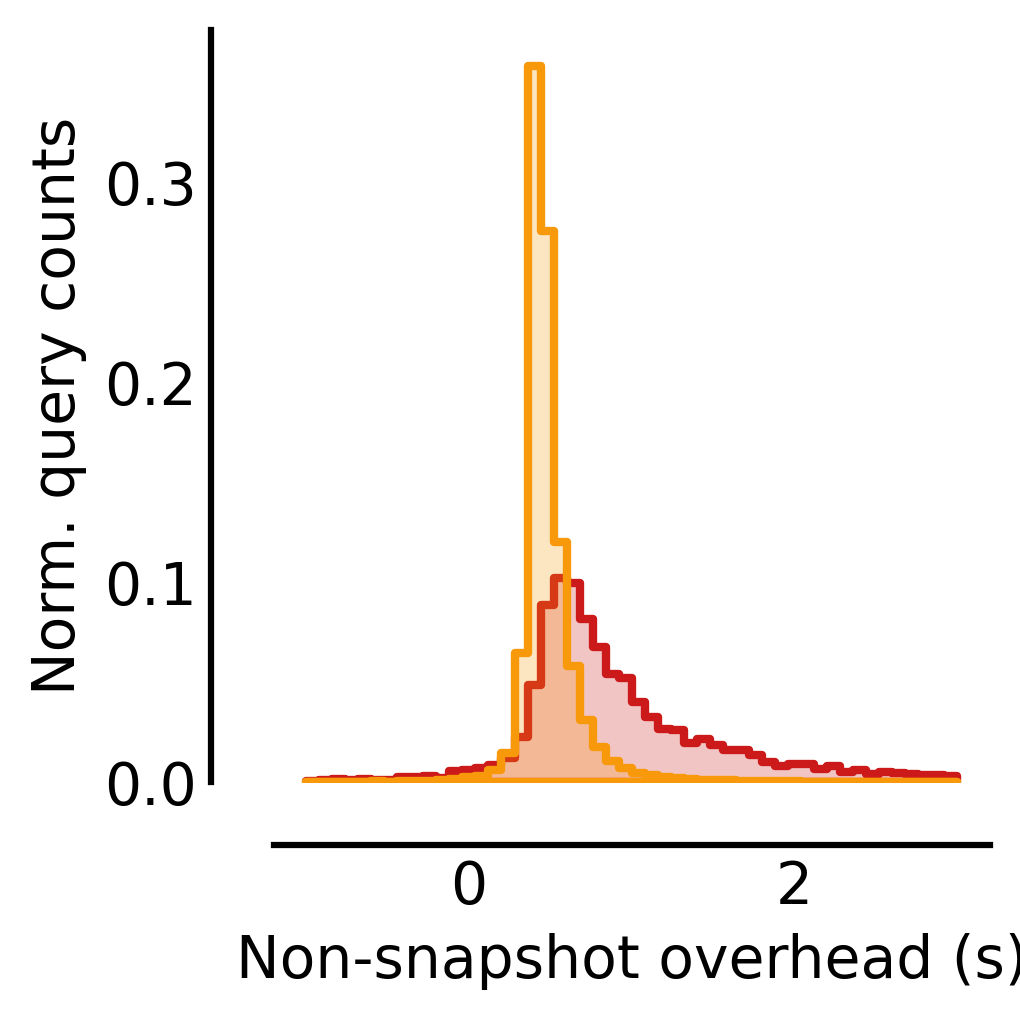

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=14, which="major")
plt.tick_params(length=0, width=0, labelsize=14, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)

sns.histplot(data=diff_plot_mdf,
             x="time", hue="plot_category",
             bins=np.linspace(-1, 3, 51), 
             stat="probability", common_norm=False, legend=False,
             palette=presyn_cmap,
             element="step", lw=2)
# plt.xscale("log")

plt.xlabel("Non-snapshot overhead (s)", fontsize=14)
plt.ylabel("Norm. query counts", fontsize=14)

# plt.yticks([0, 0.01, 0.02, 0.03])
sns.despine(ax=ax, offset=15, trim=False)
plt.tight_layout()

plt.savefig(f"{figure5_dir}/presyn_query_nosnapshot_overhead_hist.png", dpi=300)
plt.savefig(f"{figure5_dir}/presyn_query_nosnapshot_overhead_hist.pdf", dpi=300)

plt.show()